## [Importing the libraries]()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
from scipy import stats
from statistics import *
from sklearn.model_selection import *
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## [Data Collection and Analysis]()

In [2]:
#loading the data from csv file to pandas DataFrame
data = pd.read_csv('Desktop/python/creditcard.csv')

In [3]:
#first five rows of the Dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last five rows of the Dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
 #number of rows and columns
data.shape

(284807, 31)

#### We have $284807$ observation and $31$ variables

In [6]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## [Categorical feature]()
- Class

In [7]:
#checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There is no missing values in the dataset.

## [Data Analysis]()

In [8]:
#statistical measures of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking duplicated values

In [9]:
data.drop_duplicates(keep="first", inplace=True)

In [10]:
data.drop("Time",inplace=True,axis=1)

## [Exploratory Data Analysis]()

### Univariate Analysis

In [11]:
data.shape

(283726, 30)

In [13]:
data[["Class"]].value_counts()

Class
0        283253
1           473
dtype: int64

In [14]:
fair=data[data.Class==0]
fraud= data[data.Class==1]

In [15]:
fair.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Plots

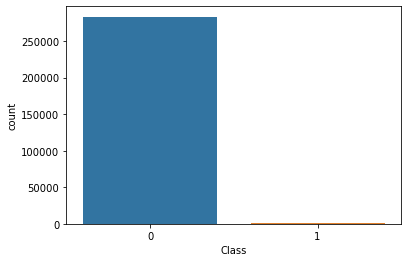

In [19]:
sns.countplot(x=data.Class)
plt.show()

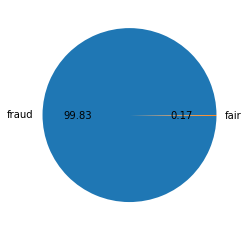

In [18]:
plt.pie(x=data.Class.value_counts(),labels=["fraud","fair"],autopct="%0.2f")
plt.show()

### Histogram

In [20]:
num=data.drop(columns="Class").iloc[:,0:30]
cat=data.Class

In [21]:
X=data.drop(columns="Class")
Y=data.Class

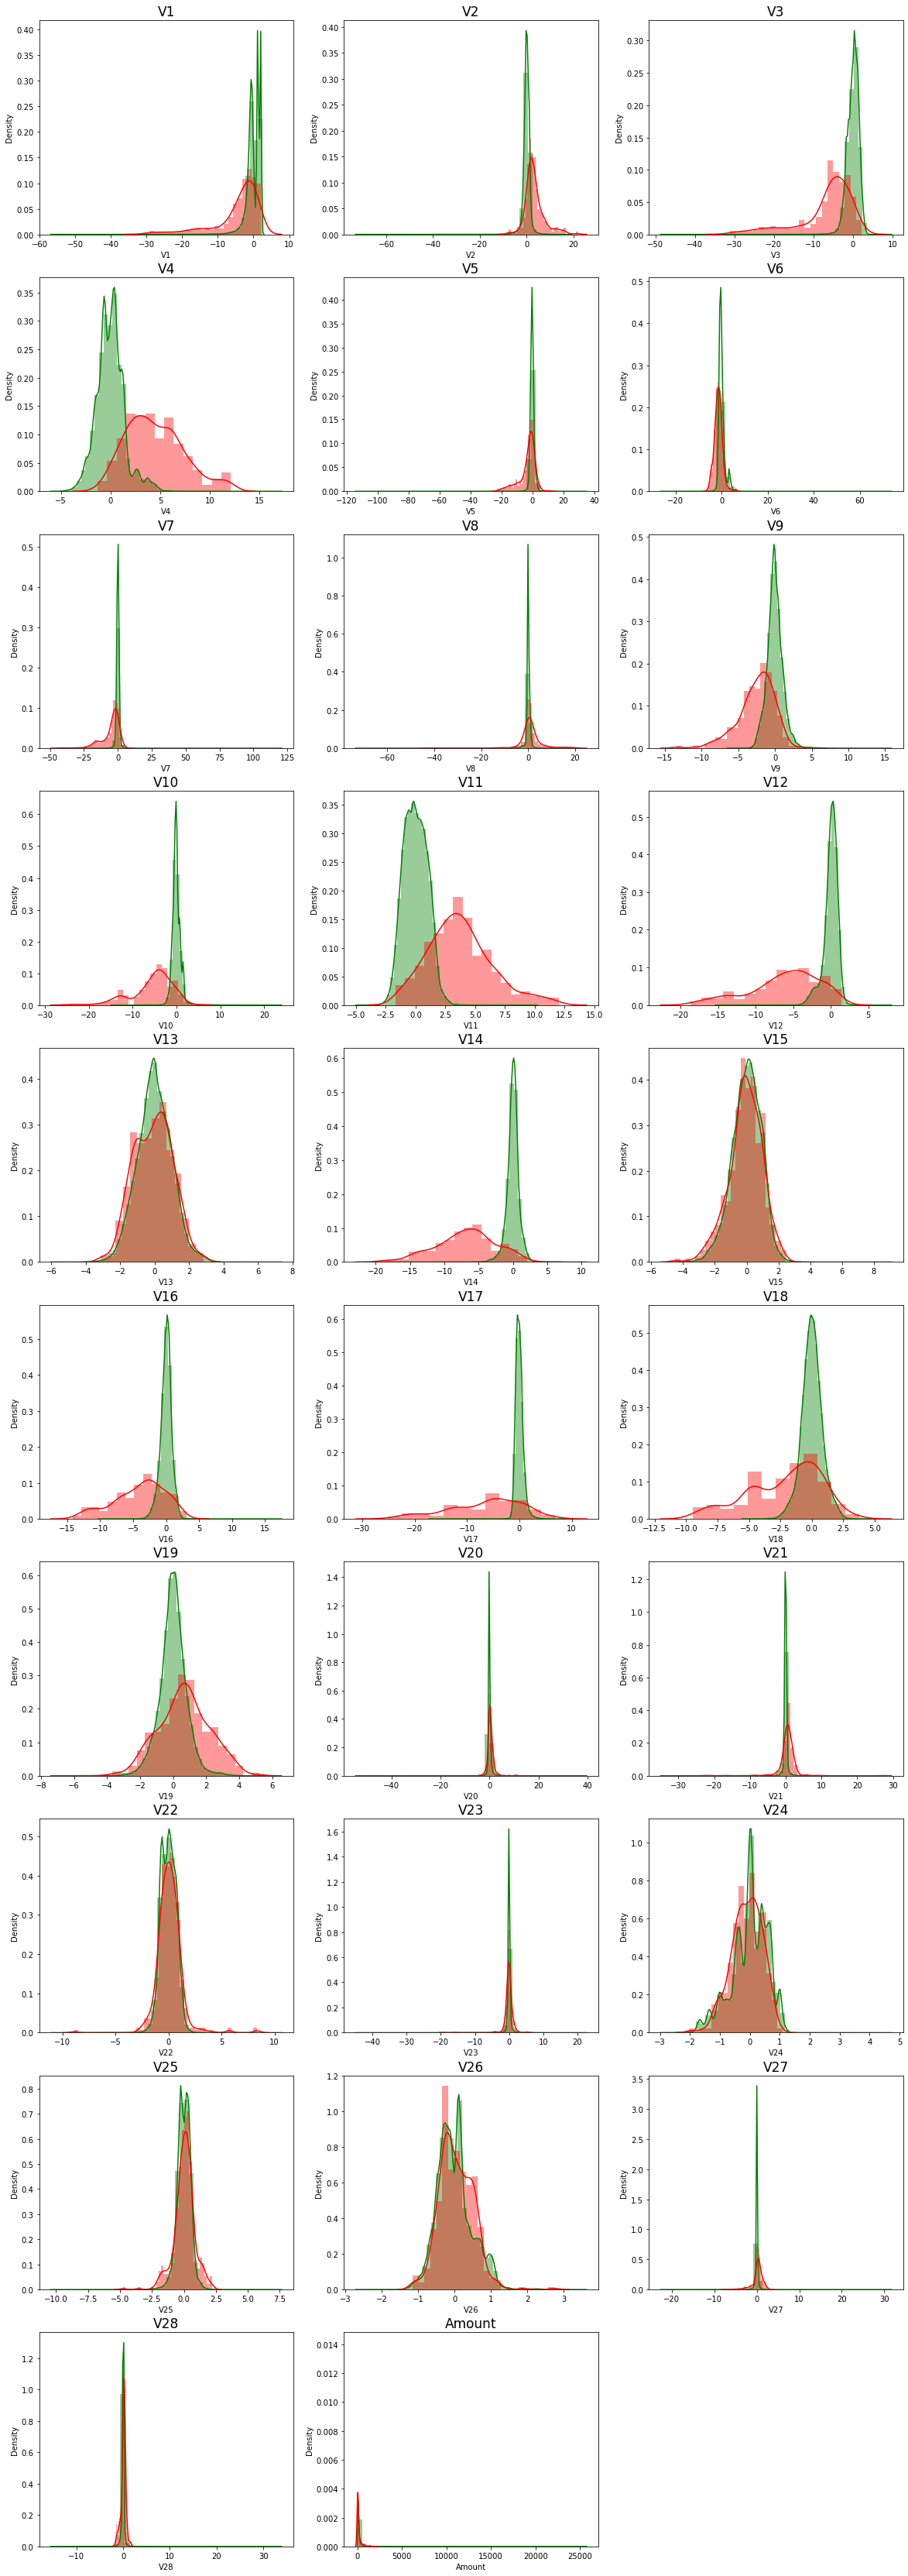

In [24]:
plt.figure(figsize=(20,60))
for i,col in enumerate(num):
    plt.subplot(10,3,i+1)
    sns.distplot(X[col][data.Class==0],color="green")
    sns.distplot(X[col][data.Class==1],color="Red")
    plt.title(col,fontsize=17)
plt.show()

### Normality Check

In [26]:
from scipy.stats import *
skew=skew(data[num.columns])
for i in range(len(skew)):
    print(num.columns[i],"=",skew[i])

V1 = -3.2732539433146313
V2 = -4.695137078165147
V3 = -2.151972579994067
V4 = 0.6715006205655433
V5 = -2.4140664842156188
V6 = 1.829870709562578
V7 = 2.89025591243399
V8 = -8.310926391626952
V9 = 0.5376602109334686
V10 = 1.2529604545622925
V11 = 0.3440723742059371
V12 = -2.1989966559012375
V13 = 0.06429306473390697
V14 = -1.9187935694299718
V15 = -0.30965744518847976
V16 = -1.051155914238485
V17 = -3.6904776832331843
V18 = -0.24866014274940307
V19 = 0.1083112383097531
V20 = -2.043110254457903
V21 = 2.8200182046256077
V22 = -0.18232876403466888
V23 = -5.86718977219198
V24 = -0.5521263176758376
V25 = -0.41574166410064967
V26 = 0.5802892493462173
V27 = -0.7537999286092388
V28 = 11.555053994631296
Amount = 16.978713606543693


In [27]:
corr=data.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,0.003777,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971


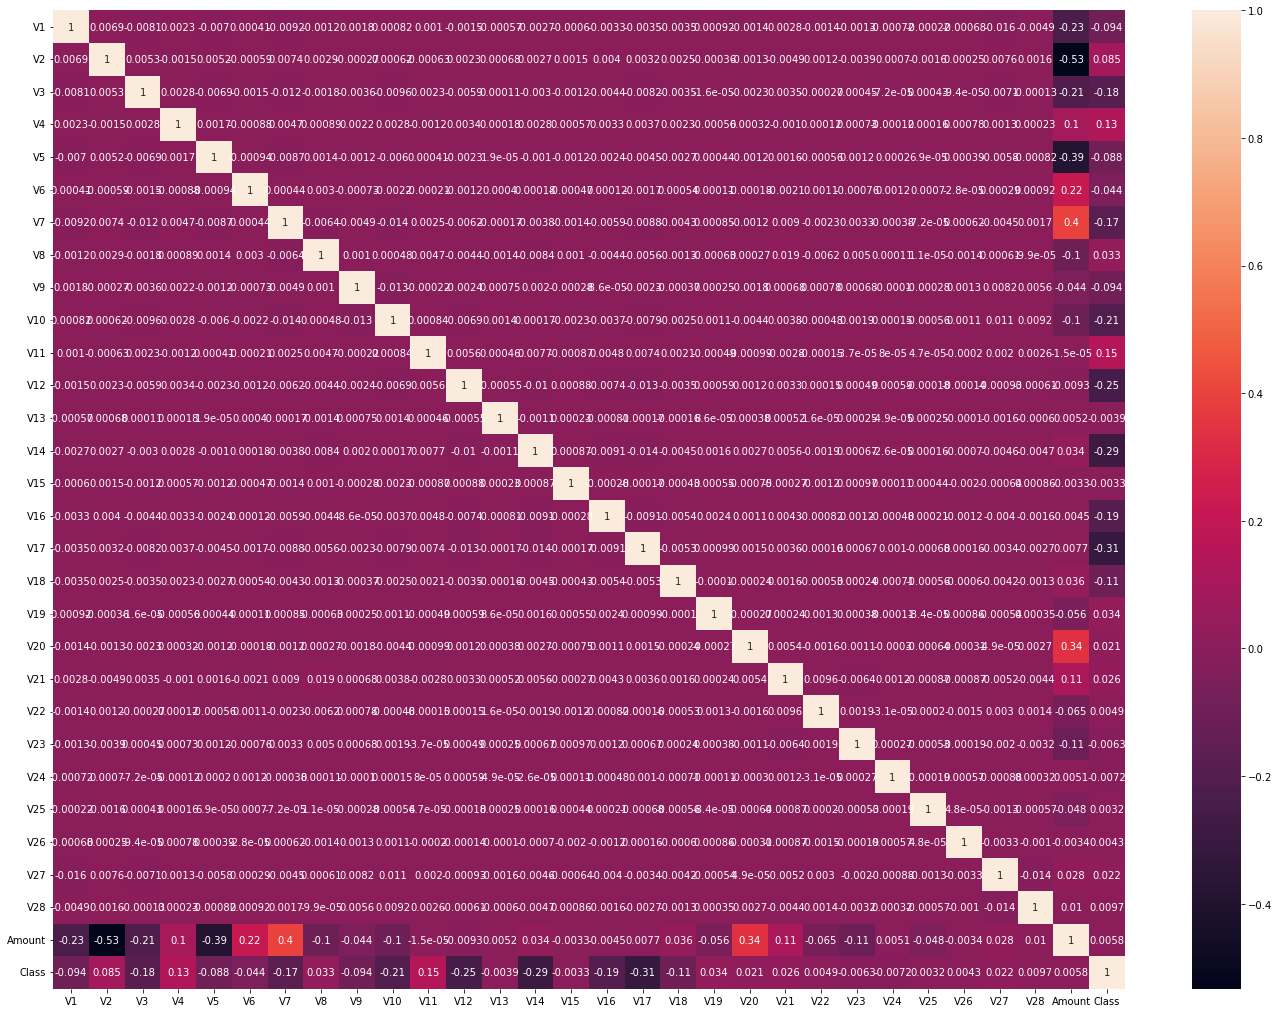

In [28]:
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True)
plt.show()

## Outlier Detection

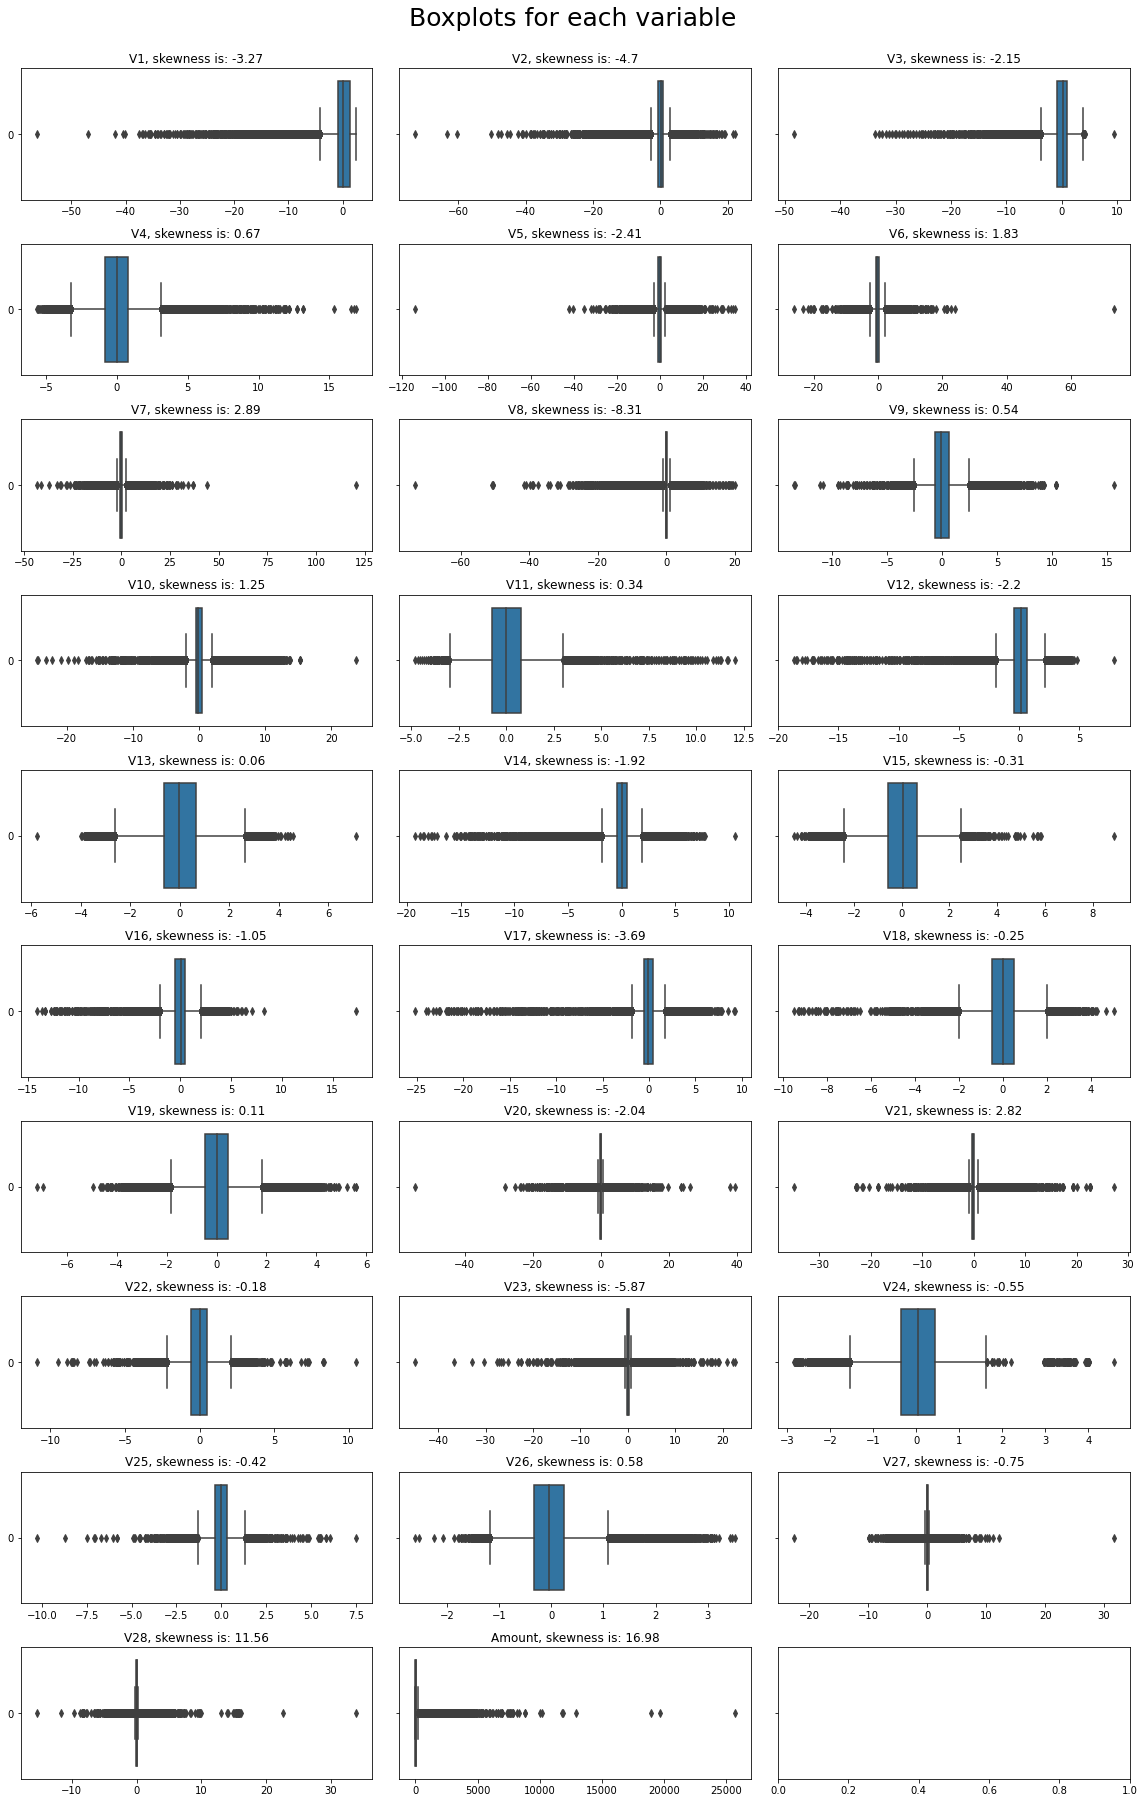

In [29]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=num, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [30]:
numeric_columns = (list(num.loc[:, 'V1':'Amount']))

In [31]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [32]:
# detecting outliers
Outliers_IQR = IQR_method(data,1,numeric_columns)

# dropping outliers
df_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


In [33]:
df_out.Class.value_counts()

0    202686
1        26
Name: Class, dtype: int64

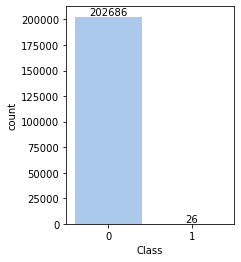

In [35]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

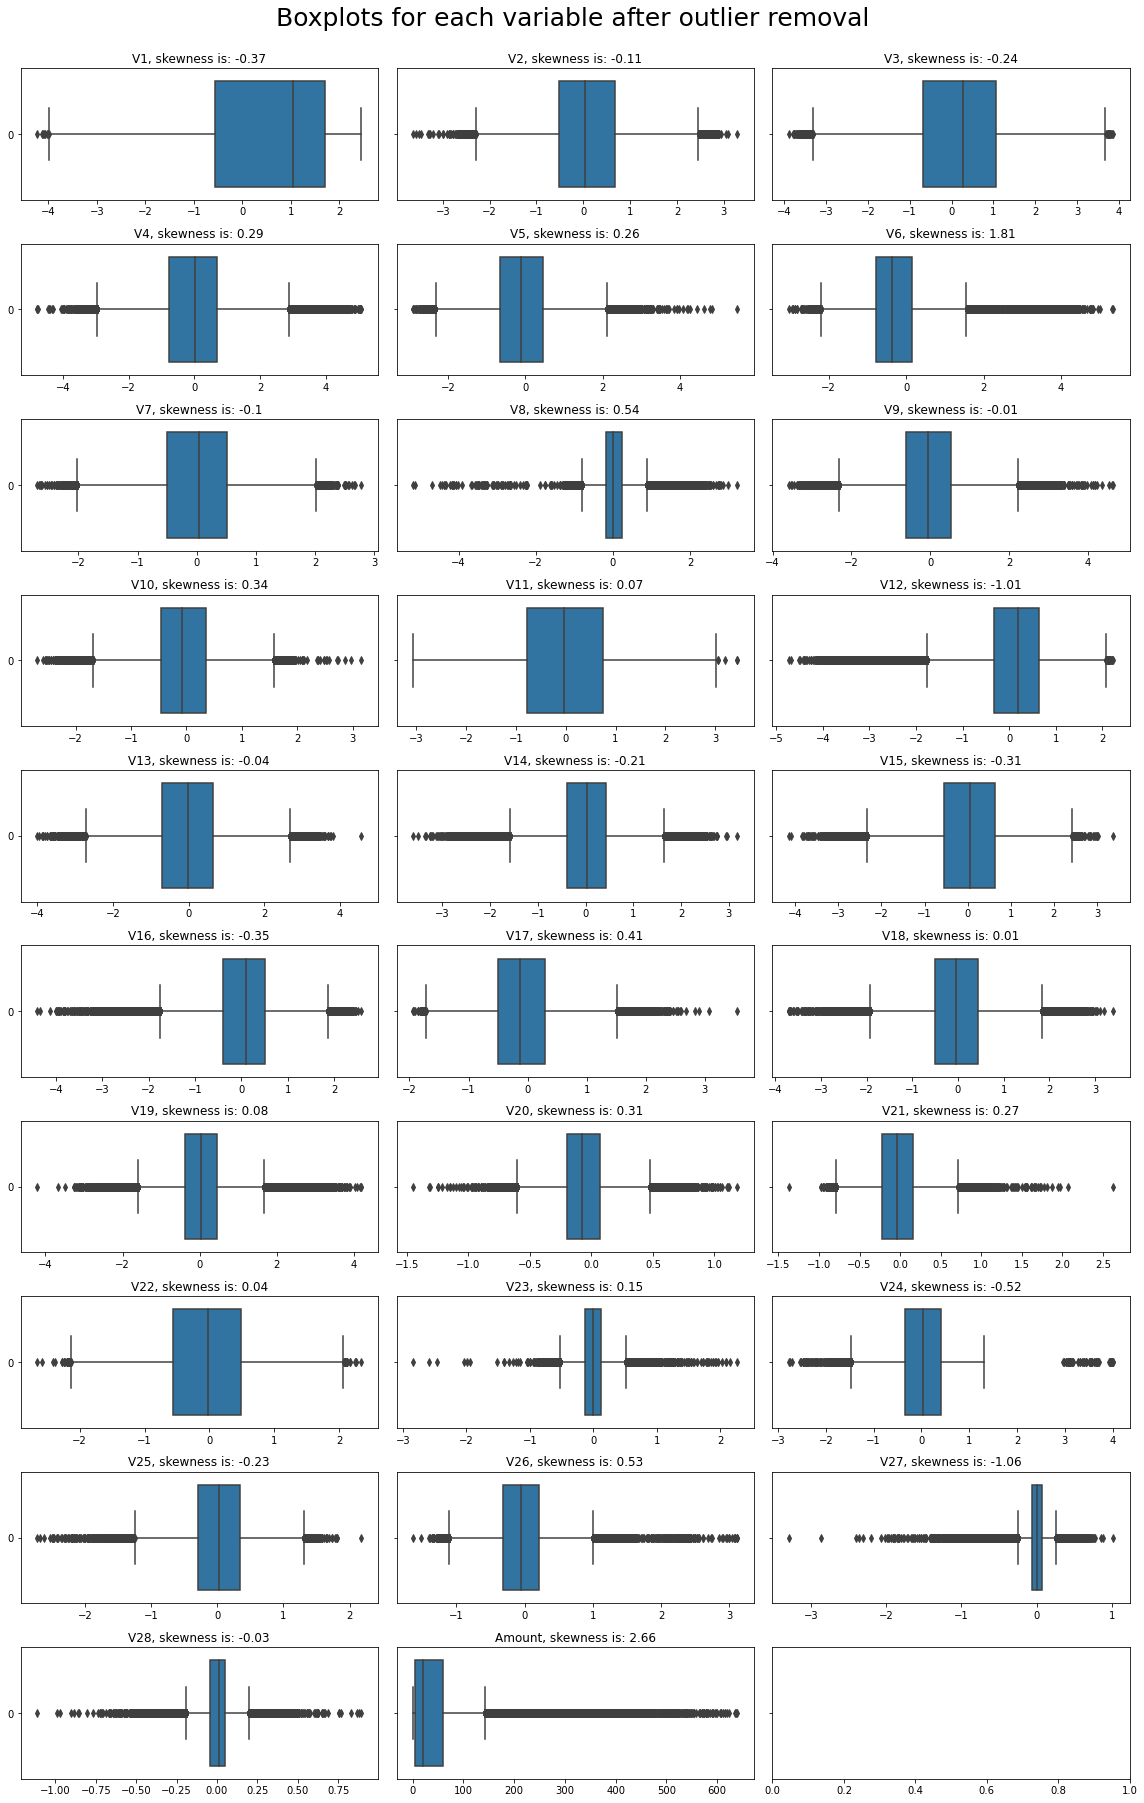

In [36]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_out, columns_list=num, rows=10, cols=3, suptitle='Boxplots for each variable after outlier removal')
plt.tight_layout()

## Splitting dataset in Training and Testing data

In [37]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [38]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
118203,-1.424587,1.076404,1.685979,-0.841631,-0.598810,-0.727663,0.766091,-0.202509,0.120981,0.020114,...,0.151845,-0.155631,-0.299288,-0.149873,0.435667,0.131692,0.927079,-0.033722,0.201092,69.39
260729,2.239274,-0.407333,-2.190175,-1.004305,0.368514,-0.632340,-0.174740,-0.275769,-0.874464,0.430649,...,0.101513,-0.046212,-0.062383,0.011729,-1.163733,0.137505,-0.234818,-0.023925,-0.054453,15.00
284668,1.786326,-0.389739,-0.817163,1.247810,-0.184970,-0.132745,-0.165448,0.033821,0.558074,0.350017,...,-0.118749,0.123585,0.286509,0.050191,-0.433841,-0.054956,-0.657182,0.014365,-0.038419,91.20
85464,-1.093040,0.346896,1.657115,0.396435,-0.683734,-0.441274,-0.135810,0.520362,0.068548,-0.915455,...,0.047284,0.268483,0.614402,-0.059844,0.447666,-0.144317,0.435483,-0.017621,0.018871,59.90
126203,-0.903155,0.568200,1.205731,0.004331,0.450145,-0.377371,0.366544,0.228268,-0.437136,-0.231358,...,-0.036983,-0.206929,-0.493182,0.390623,-0.063572,-0.207800,0.090411,0.172782,0.037575,1.79


In [39]:
Y_train.head()

118203    0
260729    0
284668    0
85464     0
126203    0
Name: Class, dtype: int64

## Feature Scaling

In [41]:
# Creating function for scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# [Random Forest without Oversampling]()

In [42]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [43]:
score = cross_val_score(rf, X_train, Y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.74025974 0.75324675 0.76923077 0.79487179 0.75641026]
Average Cross Validation Recall score: 0.7628038628038627


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf1 = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, Y_train)

In [ ]:
print('Best parameters:', grid_rf1.best_params_)
print('Best score:', grid_rf1.best_score_)

In [ ]:
y_pred = grid_rf1.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

rf_Recall = recall_score(Y_test, y_pred)
rf_Precision = precision_score(Y_test, y_pred)
rf_f1 = f1_score(Y_test, y_pred)
rf_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
print(cm)

In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

# [Random forest with Oversampling (SMOTE)]()

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(imba_pipeline, X_train, Y_train, scoring='recall', cv=kf)

In [ ]:
## Tuning Parameter using Grid Search CV
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, Y_train);

In [ ]:
grid_imba.best_params_

In [ ]:
grid_imba.best_score_

In [ ]:
y_test_predict = grid_imba.predict(X_test)
recall_score(Y_test, y_test_predict)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

over_rf_Recall = recall_score(Y_test, y_pred)
over_rf_Precision = precision_score(Y_test, y_pred)
over_rf_f1 = f1_score(Y_test, y_pred)
over_rf_accuracy = accuracy_score(Y_test, y_pred)

print(cm)

In [ ]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

##  [Logistic Regression with Oversampling (SMOTE)]()

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [ ]:
param_grid2 =   {'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    }


#grid_rf2 = GridSearchCV(logModel, param_grid=params, cv=kf, 
#                          scoring='recall').fit(X_train, Y_train)

# [Logistic Regression with Oversampling ( SMOTE)]()

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                             LogisticRegression())
cross_val_score(imba_pipeline, X_train, Y_train, scoring='recall', cv=kf)

In [ ]:
## Tuning Parameter using Grid Search CV
new_params = {'Logistic Regression' + key: param_grid2[key] for key in param_grid2}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, Y_train);

In [ ]:
grid_imba.best_params_

In [ ]:
grid_imba.best_score_

In [ ]:
y_test_predict = grid_imba.predict(X_test)
recall_score(Y_test, y_test_predict)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

over_lg_Recall = recall_score(Y_test, y_pred)
over_lg_Precision = precision_score(Y_test, y_pred)
over_lg_f1 = f1_score(Y_test, y_pred)
over_lg_accuracy = accuracy_score(Y_test, y_pred)

print(cm)

In [ ]:
ndf = [(over_lg_Recall, over_lg_Precision, over_lg_f1, over_lg_accuracy)]

over_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_lg_score.insert(0, 'Logistic Regression', 'Random Oversampling')
over_lg_score